# Árboles de decisión

En este notebook estudiaremos cómo crear y visualizar árboles de decisión en scikit-learn. 

In [1]:
import numpy as np

# Fijar generador de números aleatorios para obtener siempre los mismos resultados
np.random.seed(28)  

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Cargamos el dataset del iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [25]:
# Si no está instalda la biblioteca graphviz

# exportar al fichero tree.dot
# se puede convertir a png con el siguiente comando en la consola:
# dot -Tpng tree.dot -o tree.png
export_graphviz(clf, out_file='tree.dot',
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True, rounded=True,
               special_characters=True)  

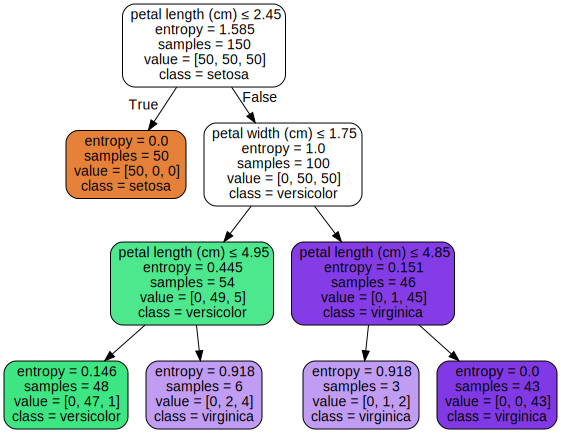

In [24]:
# Si está instalda la biblioteca graphviz
import graphviz

# Vamos a mostrar el árbol de decisión generado
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

# Entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split

# Partimos el conjunto de datos en entrenamiento (70%) y prueba (30%)
# random_state es la semilla del generador de números aleatorios. Normalmente no se establece pero
# nosotros lo usamos para obtener siempre el mismo resultado.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Creamos y entrenamos el árbol de decisión
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(1.0, 0.9777777777777777)

In [6]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                             max_depth=4,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=0)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(0.9809523809523809, 0.9777777777777777)

En este caso tenemos un arbol que está menos sobre-ajustado que el anterior porque obtiene igual resultado en test y más bajo en entrenamiento. 

# Curva de aprendizaje según un parámetro del clasificador 

Limitar la profundidad máxima del árbol de decisión puede servir para obtener un clasificador menos "ajustado" a los datos de entrenamiento y, por tanto, que generalice mejor en datos nuevos.
Podemos calcular la profundidad optima usando validación cruzada y probando distintos valores de ese parámetro.

In [7]:
from sklearn.model_selection import cross_validate
import numpy as np

train_accuracy = []
test_accuracy = []

max_depths = range(1, 6)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, iris.data, iris.target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

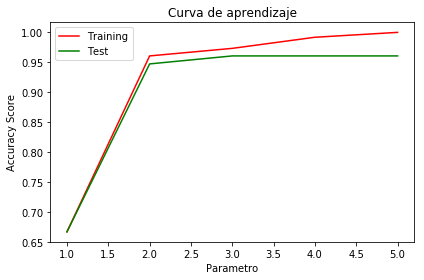

In [12]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Para max_depth=3 obtenemos el mejor valor de exactitud para el conjunto de prueba. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de prueba indicando que el clasificador está sobre-entrenado y generaliza peor.

Podríamos hacer lo mismo con el resto de parámetros del árbol hasta encontrar lo que funcionan mejor para nuestro conjunto de datos.

# Entrenando el clasificador final

 
Una vez hemos determinado la combinación de parámetros del clasificador mejores (evitando sobre-aprender) y tenemos claro cuál es el rendimiento esperable de dichos parámetros cuando usamos datos nuevos (su rendimiento en la parte de test), podemos volver a entrenar el modelo con todo el conjunto de datos y los parámetros elegidos.

In [9]:
# Suponemos la siguiente combinación como la mejor (probablemente no es cierto)
clf = DecisionTreeClassifier(criterion="entropy", 
                             splitter="best",
                             max_depth=3,
                             min_samples_split=2, 
                             max_leaf_nodes=None)
clf = clf.fit(iris.data, iris.target)

In [27]:
# Si no está instalda la biblioteca graphviz

# exportar al fichero tree.dot
# se puede convertir a png con el siguiente comando en la consola:
# dot -Tpng tree.dot -o tree.png
export_graphviz(clf, out_file='tree.dot', 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True) 


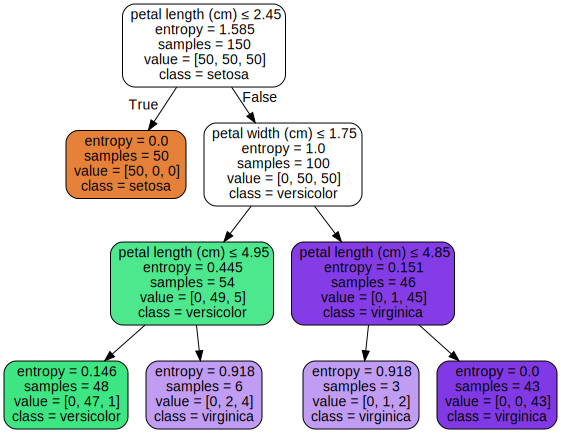

In [28]:
# Si está instalda la biblioteca graphviz

# Este sería el árbol de clasificación que usaríamos ante datos nuevos, 
# y que, consideramos que ha aprendido razonablemente bien de los datos disponibles
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [29]:
# Predecimos el valor de un ejemplo que nunca hemos visto
clf.predict([[5, 3, 1, 0.1]])
# Nos da la clase 0 que es setosa

array([0])